In [75]:
import numpy as np 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [140]:
num_p = 1000
num_n = 1000
n = num_n + num_p 
d = 10
Xp = np.random.multivariate_normal(np.zeros(10)+1,np.eye(10),size=(num_p))
Xn = np.random.multivariate_normal(np.zeros(10)-1,np.eye(10),size=(num_n))

#w = np.random.uniform(0,1,10)
X = np.vstack([Xp,Xn])
print(X.shape) 
w = np.ones(d)*4 

Y = np.sign(np.dot(X,w))

perm = np.random.choice(range(n),n,replace=False)
X = X[perm]
Y = Y[perm]

X1 = X[:,0:5]
X2 = X[:,5:10]

(2000, 10)


In [130]:
def remove_from_U(U,s):
    U = list(set(U).difference(set(s)))
    U = np.array(U)
    return U 
def add_to_L(L,s):
    L = list(L) 
    L.extend(list(s))
    L = np.array(L)
    return L 
def add_to_Y(Y,Y_s):
    Y = list(Y)
    Y.extend(list(Y_s))
    return np.array(Y)


In [141]:
def run_self_training():
    model1 = LogisticRegression(fit_intercept=True,max_iter =  1000)
    model2 = LogisticRegression(fit_intercept=True,max_iter =  1000)

    perm = np.random.choice(range(2000),2000,replace=False)
    L = perm[:100]
    U = perm[100:]
    Y_cur = Y[L]
    lst_acc = []
    a = 16
    for i in range(100):
        model1.fit(X1[L,:],Y[L])
        model2.fit(X2[L,:],Y[L])
        if(len(U)>a):
            s1 = np.random.choice(U,a,replace=False )
        else:
            s1 = U
        
        U = remove_from_U(U,s1)
        if(len(U)>a):
            s2 = np.random.choice(U,a,replace=False )
        else:
            s2 = U 
        U = remove_from_U(U,s2)
        if(len(s1)>0 and len(s2)>0):
            L = add_to_L(L,s1)
            L = add_to_L(L,s2) 
            
            Y_s1 = model1.predict(X1[s1,:])
            Y_s2 = model1.predict(X2[s2,:])
            Y_cur = add_to_Y(Y_cur,Y_s1)
            Y_cur = add_to_Y(Y_cur,Y_s2)
            #print(len(Y_cur))
            acc = accuracy_score(Y_cur[100:],Y[L[100:]])
            lst_acc.append(acc)
    return lst_acc  


In [142]:
out = []
T = 10
for t in range(T):
    out.append(run_self_training())

Text(0, 0.5, 'accuracy of pseudo labels')

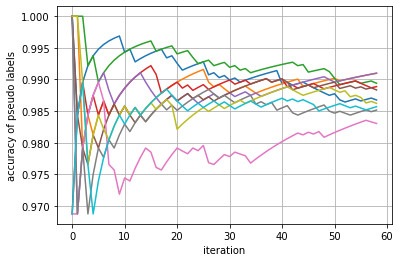

In [143]:
import matplotlib.pyplot as plt 
for t in range(T):
    plt.plot(range(len(out[t])),out[t])

plt.grid() 
plt.xlabel('iteration')
plt.ylabel('accuracy of pseudo labels')

Text(0, 0.5, 'accuracy of pseudo labels')

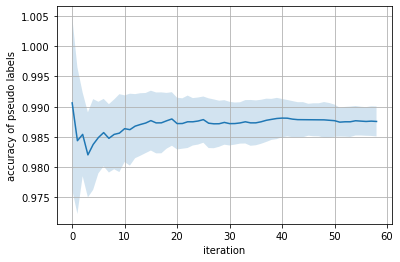

In [144]:
import matplotlib.pyplot as plt 
y = np.mean(out,axis=0)
y_err = np.std(out,axis=0)
plt.plot(range(len(y)),y) 
plt.fill_between(range(len(y)), y-y_err,y+y_err,alpha=0.2)

plt.grid() 
plt.xlabel('iteration')
plt.ylabel('accuracy of pseudo labels')

Text(0, 0.5, 'accuracy of pseudo labels')

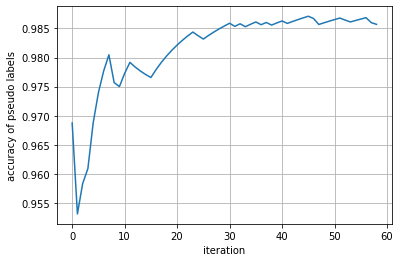

In [145]:
import matplotlib.pyplot as plt 
plt.plot(range(len(lst_acc)), lst_acc)
plt.grid() 
plt.xlabel('iteration')
plt.ylabel('accuracy of pseudo labels')